Objectives:

1. Introduce the concept of cognitive architectures in the context of Observational Network Dynamics (OND).
2. Explore how cognitive processes can be modular and distributed.
3. Implement a simple model to demonstrate how specialized components contribute to collective intelligence.
4. Examine phase transitions in synchrony to reveal how unified cognition arises.

#### Introduction:

Cognitive architectures aim to model the complex structures and processes that underlie cognition. In the OND framework, we can represent cognitive processes as modular, distributed systems with asymmetric visibility, allowing us to study how collective intelligence emerges from networks of simple nodes.

#### Mathematical Model:

For this notebook, let's consider a simple model where each node represents a specialized cognitive function (e.g., visual processing, language comprehension). The state of each node evolves according to:

\[
\frac{dx_i}{dt} = f(x_i, \{x_j\}_{j \in N_i}) + g(x_i, y_i)
\]

Here, \( f \) captures the interactions with neighboring nodes, and \( g \) represents the influence of the observer nodes, which could be specialized components like memory or attention.

#### Simulation Steps:

1. Initialize states for cognitive function nodes and observer nodes.
2. Update the state of each node based on its specialized function and its interactions with neighboring nodes.
3. Examine global metrics like synchronization to study phase transitions.

#### Visualizations:

1. **Network State**: Plot showing the current state of each cognitive function node.
2. **Synchronization Metrics**: Time-series plot of global synchronization metrics.
3. **Phase Transition Diagram**: Diagram showing phase transitions as a function of some control parameter (e.g., coupling strength).

Would you like to delve deeper into this notebook, or shall we proceed to the next one?

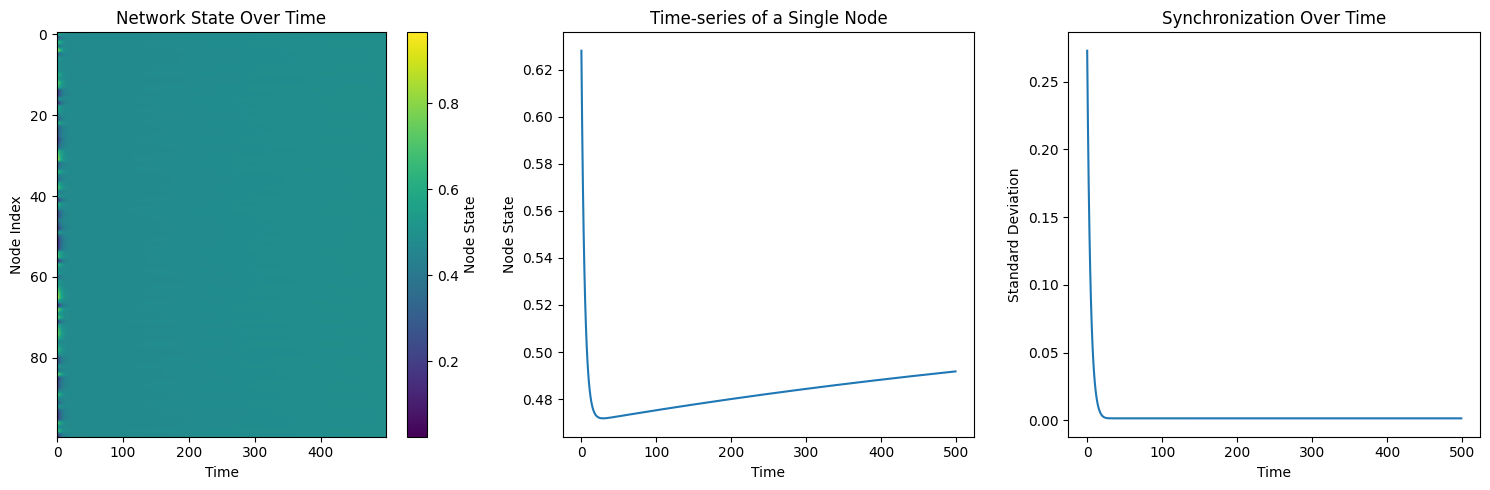

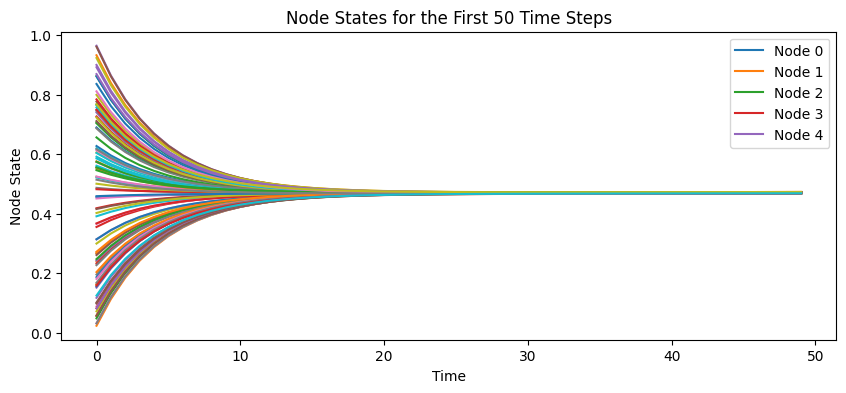

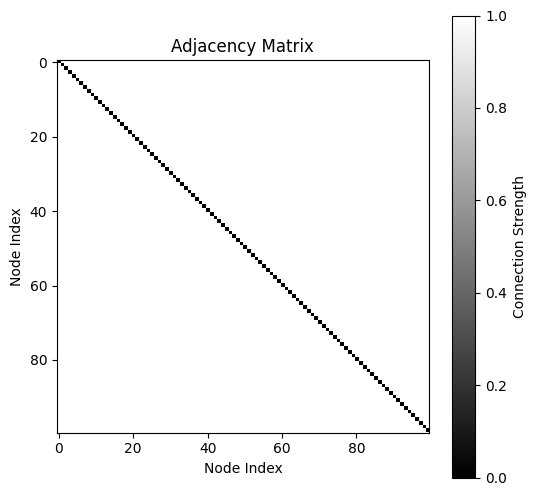

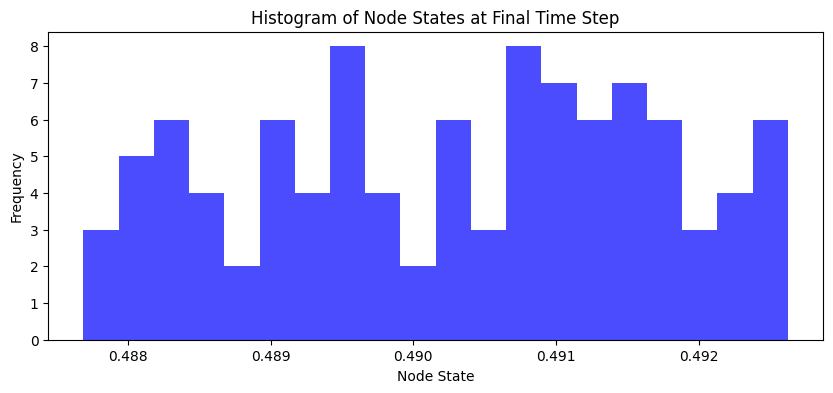

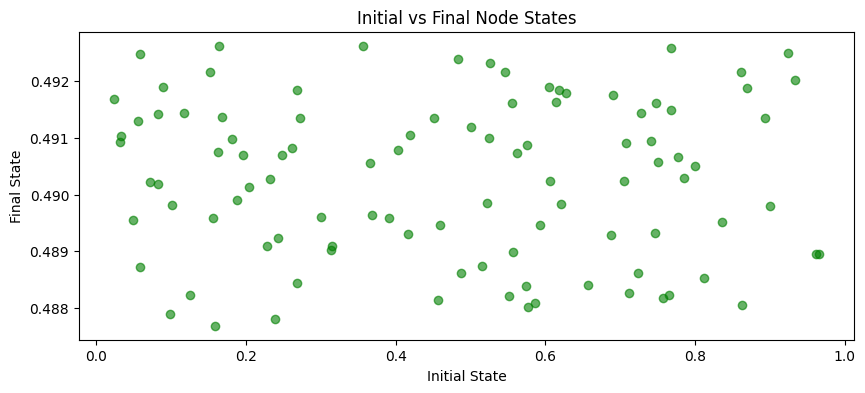

In [12]:
# Re-importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters with modified values
N = 100  # Number of nodes
T = 500  # Time steps
dt = 0.01  # Smaller time step size for numerical stability
alpha = 0.2  # Reduced coupling strength for cognitive function interactions
beta = 0.1  # Reduced coupling strength for observer influence

# Initialize state vectors again for cognitive function nodes and observer nodes
x = np.random.rand(N, T)  # States for cognitive function nodes are re-initialized
y = np.random.rand(N, T)  # States for observer nodes are re-initialized

# Adjacency matrix for a fully connected network
adj_matrix = np.ones((N, N)) - np.eye(N)

# Update the state of each node with new parameters and limits
for t in range(1, T):
    for i in range(N):
        # Calculate the interaction term for cognitive functions
        interaction_term = np.sum(adj_matrix[i, :] * (x[:, t-1] - x[i, t-1]))
        
        # Calculate the observer influence term
        observer_term = y[i, t-1] - x[i, t-1]
        
        # Update the state using Euler's method
        dx = dt * (alpha * interaction_term + beta * observer_term)
        x[i, t] = np.clip(x[i, t-1] + dx, 0, 1)  # Clipping the state to [0, 1]
        y[i, t] = y[i, t-1]  # For simplicity, keep observer states constant

# Calculate the global synchronization metric with new states
synchronization = np.mean(np.std(x, axis=0))

# Visualization
plt.figure(figsize=(15, 5))

# Plot showing the current state of each cognitive function node
plt.subplot(1, 3, 1)
plt.imshow(x, aspect='auto', cmap='viridis')
plt.title("Network State Over Time")
plt.xlabel("Time")
plt.ylabel("Node Index")
plt.colorbar(label="Node State")

# Time-series plot of the state of a single node
plt.subplot(1, 3, 2)
plt.plot(x[0, :])
plt.title("Time-series of a Single Node")
plt.xlabel("Time")
plt.ylabel("Node State")

# Plot showing the standard deviation at each time step (as a measure of synchronization)
plt.subplot(1, 3, 3)
plt.plot(np.std(x, axis=0))
plt.title("Synchronization Over Time")
plt.xlabel("Time")
plt.ylabel("Standard Deviation")

plt.tight_layout()
plt.show()

# Additional Visualizations

# 1. Plotting the first few time steps to examine initial dynamics
plt.figure(figsize=(10, 4))
plt.plot(x[:, :50].T)
plt.title("Node States for the First 50 Time Steps")
plt.xlabel("Time")
plt.ylabel("Node State")
plt.legend(["Node {}".format(i) for i in range(min(5, N))], loc="upper right")
plt.show()

# 2. Heatmap of the adjacency matrix to visualize network connections
plt.figure(figsize=(6, 6))
plt.imshow(adj_matrix, cmap='gray')
plt.title("Adjacency Matrix")
plt.xlabel("Node Index")
plt.ylabel("Node Index")
plt.colorbar(label="Connection Strength")
plt.show()

# 3. Histogram of node states at the final time step to observe distribution
plt.figure(figsize=(10, 4))
plt.hist(x[:, -1], bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Node States at Final Time Step")
plt.xlabel("Node State")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter plot of initial vs final states to observe state change
plt.figure(figsize=(10, 4))
plt.scatter(x[:, 0], x[:, -1], color='green', alpha=0.6)
plt.title("Initial vs Final Node States")
plt.xlabel("Initial State")
plt.ylabel("Final State")
plt.show()

